# Dois tanques:

Equação

In [1]:
# Importação de pacotes
import serial
from time import sleep, time

from numpy import linspace, array, hstack

## Pacotes que permitem manipular como os gráficos aparecem neste notebook
from matplotlib.pyplot import figure
from IPython import display
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

In [2]:
# Gráfico

def grafico(h1,h2,v1,v2,instanteTempo):
    
    fig = figure(figsize=(4,8))
    
    ax = fig.add_subplot(2, 1, 1)
    ax.plot([0, 0], [0, 20], 'k-', [1, 1], [0, 20], 'k-')
    ax.plot([0, 1],[float(h2), float(h2)],'b-')
    ax.set_ylabel('h2')
    ax.set_ylim(0,20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True)
    
    ax = fig.add_subplot(2, 1, 2)
    ax.plot([0, 0], [0, 20], 'k-',[1, 1], [0, 20], 'k-')
    ax.plot([0, 1], [float(h1), float(h1)], 'b-')
    ax.set_ylabel('h1')
    ax.set_ylim(0,20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True) 
    
    ax.text(1.1, 2.2, 'Tempo: {:.2f} s'.format(instanteTempo), fontsize=14, verticalalignment='top',)
    ax.text(1.1, 0.95, 'v1: {:.2f} V | v2: {:.2f} V'.format(float(v1), float(v2)), fontsize=14, verticalalignment='top',)
    

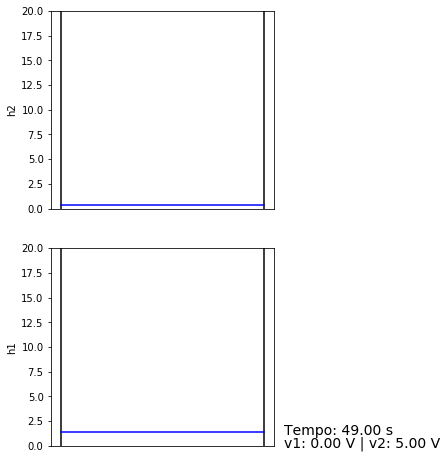

In [6]:
delta_time = []
delta_time_a = []

ser = serial.Serial('/dev/ttyUSB0', 9600)  # Establish the connection on a specific port

nsim = 50 # Quantidade total de amostras

Ts = 1. # Período de amostragem

# Variáveis exógenas
v1 = [0.0]*10
[v1.append(3.) for it in range(20)]
[v1.append(0.) for it in range(20)]

v2 = [0.0]*10
[v2.append(0.) for it in range(20)]
[v2.append(5.) for it in range(20)]


# Iniciando listas
h1 = []
h2 = []
v1_ = []
v2_ = []

x = ser.readline()

print(x)

for it in range(nsim):
    
    ser.write(bytearray('{:.2f};{:.2f};{:.2f}\n'.format(v1[it],v2[it],Ts),'ASCII'))
    
    start = time()
    x = ser.readline().decode("utf-8")
    end = time()
    
    data = x.split('&')

    h1.append(float(data[0]))
    h2.append(float(data[1]))
    v1_.append(float(data[2]))
    v2_.append(float(data[3]))
    delta_time.append(end-start)

    # mostrando a figura
    grafico(*data,it*Ts)
    display.clear_output(wait=True)
    show_inline_matplotlib_plots()
        
    
ser.close() # Fechando a conexão com o arduino através da porta serial

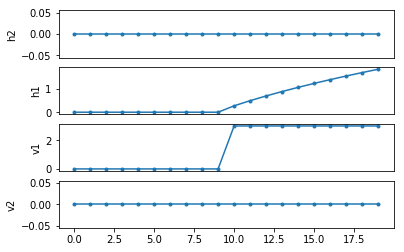

In [4]:
tempo = linspace(0,(nsim-1)*Ts,nsim)

fig = figure()
axes = fig.add_subplot(4,1,1)
axes.plot(tempo,h2,'.-')
axes.set_ylabel('h2')
axes.get_xaxis().set_visible(False)
axes = fig.add_subplot(4,1,2)
axes.plot(tempo,h1,'.-')
axes.set_ylabel('h1')
axes.get_xaxis().set_visible(False)
axes = fig.add_subplot(4,1,3)
axes.plot(tempo,v1_,'.-')
axes.set_ylabel('v1')
axes.get_xaxis().set_visible(False)
axes = fig.add_subplot(4,1,4)
axes.plot(tempo,v2_,'.-')
axes.set_ylabel('v2')
display.clear_output(wait=True)